In [1]:
# auto-reload changed source files when they are imported
%reload_ext autoreload
%autoreload 2

# add top repo dir to path so that src can be imported
import sys
sys.path.append("..")

%matplotlib inline

# Imports

In [2]:
from src.data import load_raman_spectra, load_crystal_structures
import numpy as np
from collections import Counter
import torch_geometric as pyg
import codecs
import torch
from src.visualization import plotting

# Raman

In [40]:
model_wavenumber_values = np.load('../data/processed/wavenumber_vals_v3.npy')
chosen_wavelength = 514
raman_file_paths, raman_mineral_names, raman_spectra, raman_wavelengths = load_raman_spectra.load_raman_data(model_wavenumber_values,wavelength=chosen_wavelength)
print(len(model_wavenumber_values))

266


A Raman spectrum of Actinolite:


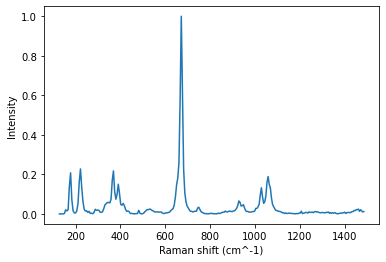

In [41]:
print(f"A Raman spectrum of {raman_mineral_names[0]}:")
plotting.plot_spectra([(x,y) for x,y in zip(model_wavenumber_values,raman_spectra[0])], legend=False)

In [42]:
print(len(raman_mineral_names), "Raman spectra loaded, each of length", len(raman_spectra[0]))
# print("wavelengths:",dict(Counter(raman_wavelengths)))
# print("minerals:",dict(Counter(raman_mineral_names)))

4130 Raman spectra loaded, each of length 266


# Crystal structures

mineral name: Durangite
cell parameters: [  6.5789   8.5071   7.0212  90.     115.447   90.    ]

i el atomic_number atomic_weight electronegativity xyz occ Biso
0 Na 11 22.99 [2.53523972 1.46092428 1.58500629] 0.93 0.95 1.0453884981633847
1 Li 3 6.94 [2.53523972 1.46092428 1.58500629] 0.98 0.05 1.0453884981633847
2 Al 13 26.982 [0. 0. 0.] 1.61 0.91 0.4374208670562803
3 Fe 26 55.845 [0. 0. 0.] 1.83 0.09 0.4374208670562803
4 As 33 74.922 [-0.75421028  2.6759083   1.58500629] 2.18 1.0 0.3979424494519229
5 O 8 15.999 [0.05232366 3.70416148 2.63447066] 3.44 1.0 0.7540377762432269
6 O 8 15.999 [0.33533372 1.7275368  0.71699345] 3.44 1.0 0.6616582790490306
7 F 9 18.998 [-2.26263084  0.57040106  4.75501887] 3.98 0.73 0.5676996451506598
8 O 8 15.999 [-2.26263084  0.57040106  4.75501887] 3.44 0.27 0.5676996451506598


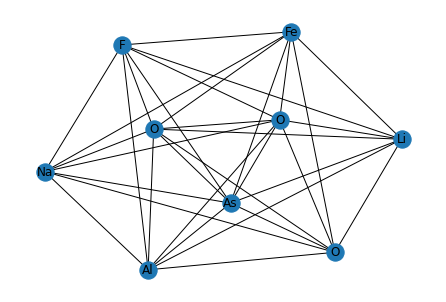

In [43]:
fp = "../data/raw/CIFs2/Durangite0019593.cif"
mineral_name, G = load_crystal_structures.load_single_crystal_structure(fp,verbose=True)

In [44]:
cif_mineral_names = []
cif_graphs = []
big_cif_file_path = '../data/raw/cifdata.txt'
temp_file_path = '../data/raw/tempcif.txt'
cur_mineral_name = ''
cur_cif_lines = []
with open(big_cif_file_path,'r',errors='ignore') as f:
    for line in f:
        if line.startswith("_chemical_formula_sum ''"):
            continue
        if line.startswith('_chemical_name_mineral'):
            cur_mineral_name = line.split("'")[1]
        if line.startswith('_amcsd_formula_title '):
            cur_mineral_name = line.split("'")[1]
        if line.startswith('END'):
            try:
                with codecs.open(temp_file_path,'w','utf-8') as out:
                    out.write(''.join(cur_cif_lines))
                _,G = load_crystal_structures.load_single_crystal_structure(
                                                temp_file_path,
                                                min_distance_for_edge=-1,
                                                max_distance_for_edge=np.inf,
                                                )
                cif_graphs.append(G)
                cif_mineral_names.append(cur_mineral_name)
            except:
                pass
            cur_cif_lines = []
        else:
            cur_cif_lines.append(line)

12:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 289; doi:10.3390/cryst807
>  ^
12:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 289; doi:10.3390/cryst807
>  ^
12:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 289; doi:10.3390/cryst807
>  ^
12:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 289; doi:10.3390/cryst807
>  ^
12:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 289; doi:10.3390/cryst807
>  ^
12:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 289; doi:10.3390/cryst807
>  ^
12:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 289; doi:10.3390/cryst807
>  ^
12:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 289; doi:10.3390/cryst807
>  ^
12:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 289; doi:10.3390/cryst807
>  ^
12:0: Trying to fin

Unexpected error:
Unexpected error:


13:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 8
>  ^
13:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 8
>  ^
14:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 33
>  ^
14:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last 33
>  ^
15:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last doi:10.3390
>  ^
15:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last doi:10.3390
>  ^
15:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last doi:10.3390
>  ^
15:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last doi:10.3390
>  ^
15:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last doi:10.3390
>  ^
15:0: Trying to find one of data_value_1, start_sc_line
>  _journal_page_last doi:10.3390
>  ^
11:0: Trying to find one of data_value_1, start_sc_line
>  _journal_year 1974
>  ^
11:0:

In [8]:
# print(dict(Counter(cif_mineral_names)))

# Combine

### Decide on minerals

In [50]:
all_minerals = set(cif_mineral_names+raman_mineral_names)
cif_counter = Counter(cif_mineral_names)
raman_counter = Counter(raman_mineral_names)
minimum_number_for_each = 1
minerals_for_dataset = []
for mineral in all_minerals:
    if cif_counter[mineral] >= minimum_number_for_each and raman_counter[mineral] >= minimum_number_for_each:
        minerals_for_dataset.append(mineral)
minerals_for_dataset.remove('Diamond')
minerals_for_dataset.remove('Sulphur')
minerals_for_dataset.remove('Silicon')
print(minerals_for_dataset)
print(len(minerals_for_dataset),'/',len(all_minerals))

['Thorite', 'Marialite', 'Calcite', 'Siegenite', 'Libethenite', 'Zircon', 'Metatorbernite', 'Shortite', 'Zoisite', 'Kanoite', 'Arsenolite', 'Serandite', 'Cornetite', 'Leucophanite', 'Franciscanite', 'Strontianite', 'Fluorite', 'Baryte', 'Aurichalcite', 'Gaspeite', 'Nepheline', 'Chambersite', 'Actinolite', 'Chiolite', 'Dioptase', 'Datolite', 'Montebrasite', 'Quartz', 'Hanksite', 'Clinohumite', 'Bobdownsite', 'Andalusite', 'Brookite', 'Gedrite', 'Aegirine', 'Pectolite', 'Arfvedsonite', 'Augite', 'Whitlockite', 'Epididymite', 'Akermanite', 'Phenakite', 'Narsarsukite', 'Almandine', 'Huntite', 'Kinoite', 'Creedite', 'Rhodizite', 'Hardystonite', 'Lazurite', 'Trilithionite', 'Chalcopyrite', 'Adamite', 'Turquoise', 'Humite', 'Petalite', 'Anorthite', 'Germanite', 'Lawsonite', 'Inderite', 'Olmiite', 'Paravauxite', 'Kurnakovite', 'Ulexite', 'Papagoite', 'Danburite', 'Valentinite', 'Schorl', 'Szaibelyite', 'Leucite', 'Glauberite', 'Fayalite', 'Enstatite', 'Talc', 'Vesuvianite', 'Chalcanthite', 'Gr

### Pair them up

In [51]:
data_list = []
for mineral in minerals_for_dataset:
    cur_mineral_raman_indices = [i for i, x in enumerate(raman_mineral_names) if x == mineral]
    cur_mineral_graph_indices = [i for i, x in enumerate(cif_mineral_names) if x == mineral]
    for i_raman, i_graph in zip(cur_mineral_raman_indices,cur_mineral_graph_indices):
        cur_graph = pyg.utils.convert.from_networkx(cif_graphs[i_graph])
        cur_graph['y'] = raman_spectra[i_raman]
        data_list.append(cur_graph)
        print(mineral)
        print(cur_graph['dist'])

Thorite
tensor([3.1635, 2.4951, 3.1635, 1.5306, 2.4951, 1.5306], dtype=torch.float64)
Thorite
tensor([3.1594, 4.8575, 3.1594, 5.4925, 4.8575, 5.4925], dtype=torch.float64)
Marialite
tensor([0.0000, 0.0000, 3.4447, 3.2813, 3.2813, 4.2502, 2.3515, 2.5355, 2.9121,
        3.0175, 0.0000, 0.0000, 3.4447, 3.2813, 3.2813, 4.2502, 2.3515, 2.5355,
        2.9121, 3.0175, 0.0000, 0.0000, 3.4447, 3.2813, 3.2813, 4.2502, 2.3515,
        2.5355, 2.9121, 3.0175, 3.4447, 3.4447, 3.4447, 4.2219, 4.2219, 1.6284,
        3.5165, 3.8941, 4.4092, 6.4181, 3.2813, 3.2813, 3.2813, 4.2219, 0.0000,
        3.8273, 1.6596, 4.6992, 1.6833, 4.4770, 3.2813, 3.2813, 3.2813, 4.2219,
        0.0000, 3.8273, 1.6596, 4.6992, 1.6833, 4.4770, 4.2502, 4.2502, 4.2502,
        1.6284, 3.8273, 3.8273, 3.3024, 5.1709, 4.5637, 6.9460, 2.3515, 2.3515,
        2.3515, 3.5165, 1.6596, 1.6596, 3.3024, 4.4440, 2.6554, 3.9734, 2.5355,
        2.5355, 2.5355, 3.8941, 4.6992, 4.6992, 5.1709, 4.4440, 3.5261, 4.5663,
        2.9121, 2.

In [52]:
print(len(data_list), "samples in the final dataset")
print("Each looks like:",data_list[0])

1751 samples in the final dataset
Each looks like: Data(x=[3, 5], edge_index=[2, 6], pos=[3, 3], element=[3], z=[3], dist=[6], y=[266])


In [53]:
save_path = '../data/processed/v3.pt'
data, slices, _ = pyg.data.collate.collate(
    data_list[0].__class__,
    data_list=data_list,
    increment=False,
    add_batch=True,
)
data.x = data.x.type(torch.FloatTensor)
data.pos = data.pos.type(torch.FloatTensor)
data.dist = data.dist.type(torch.FloatTensor)
data.y = torch.stack([torch.Tensor(yi) for yi in data.y]).type(torch.FloatTensor)

collated_data = (data, slices)
# torch.save(collated_data, save_path)

In [54]:
print(data)

Data(x=[20447, 5], edge_index=[2, 410568], pos=[20447, 3], element=[1751], z=[20447], dist=[410568], y=[1751, 266], batch=[20447], ptr=[1752])
